Name :  Sarvesh Kumar Rai
Enroll no. : 23117128
Batch : ME6
Dataset Taken : "World Happiness Report 2024"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
os.chdir(r"D:\downloads")

In [3]:
df  = pd.read_csv("World Happiness Report 2024.csv")

In [4]:
df.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
5,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
6,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
7,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
8,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
9,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332


In [5]:
print(df.columns)


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


In [6]:
num_duplicates = df.duplicated().sum()

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 2


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
# making a datframe with data of year 2023 only as the given dataset as multiple entries with same country name with different year
df_2023 = df[df["year"] == 2023]
df_2023.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
15,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167
31,Albania,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
64,Argentina,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
81,Armenia,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
99,Australia,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163


In [9]:
df.shape

(2363, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2363 entries, 0 to 2364
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 221.5+ KB


In [11]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483562,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,5.059436,1.125523,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,2015.000000,5.448725,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2019.000000,6.323592,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


In [12]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [13]:
df["Log GDP per capita"].median()

np.float64(9.5029459)

In [14]:
df["Log GDP per capita"].skew()

np.float64(-0.3366684589108094)

So Log GDP per capita is near to normal distribution only. so can use either of mean or median to fill null values

In [15]:
df["Log GDP per capita"] = df["Log GDP per capita"].fillna(df["Log GDP per capita"].median())


In [16]:
df["Social support"] = df["Social support"].fillna(df["Social support"].median())
df["Healthy life expectancy at birth"] = df["Healthy life expectancy at birth"].fillna(df["Healthy life expectancy at birth"].median())
df["Freedom to make life choices"] = df["Freedom to make life choices"].fillna(df["Freedom to make life choices"].median())

In [17]:
df["Generosity"] = df["Generosity"].fillna(df["Generosity"].median())
df["Perceptions of corruption"] = df["Perceptions of corruption"].fillna(df["Perceptions of corruption"].median())
df["Positive affect"] = df["Positive affect"].fillna(df["Positive affect"].median())
df["Negative affect"] = df["Negative affect"].fillna(df["Negative affect"].median())

In [18]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [19]:
# unique countries
print(df['Country name'].unique())
df['Country name'].nunique()

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

165

##### Now we will see outlier and data distrbution using plots

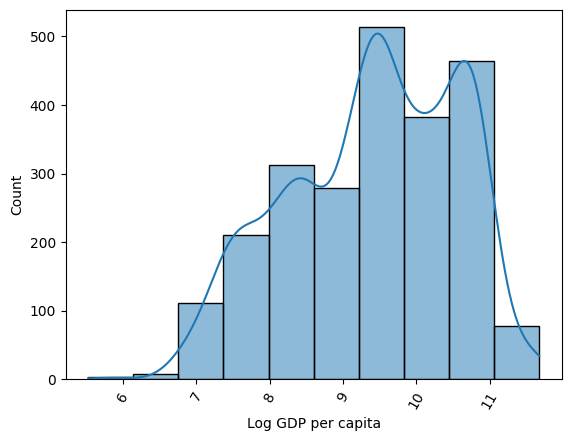

In [20]:

sns.histplot(x ='Log GDP per capita', data = df , bins = 10 , kde = True)
plt.xticks(rotation = 60)
plt.show()

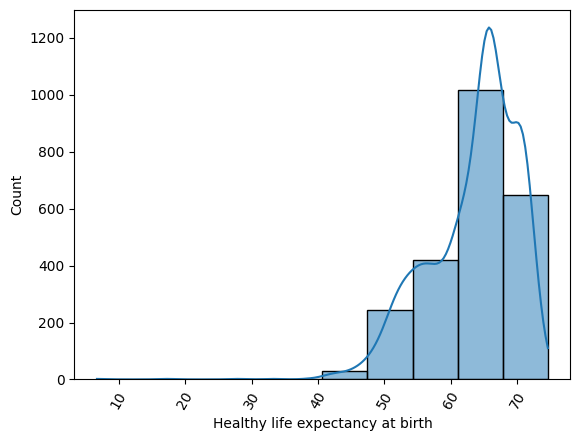

In [21]:
sns.histplot(x ='Healthy life expectancy at birth', data = df , bins = 10 , kde = True)
plt.xticks(rotation = 60)
plt.show()

This shows that Health life expectany is left skewed and has a peak betwwen 60 to 70

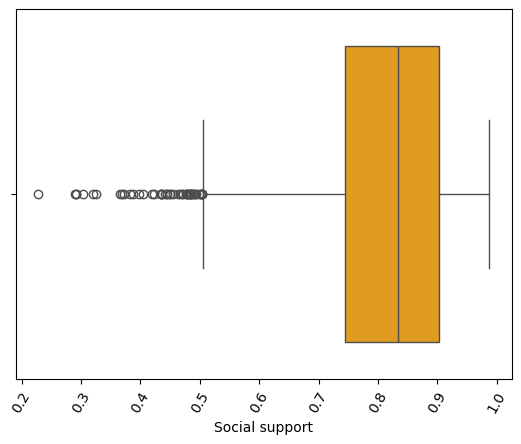

In [22]:
sns.boxplot(x ='Social support', data = df , color='orange'  )
plt.xticks(rotation = 60)
plt.show()

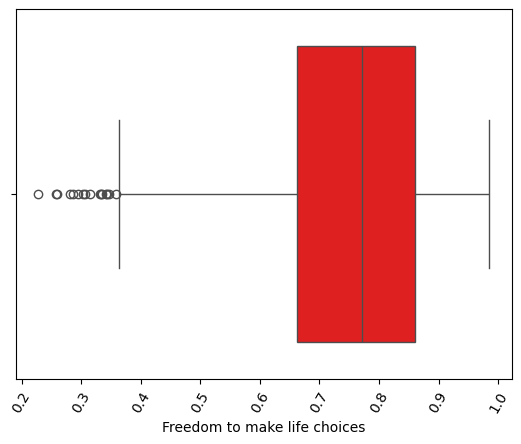

In [23]:
sns.boxplot(x ='Freedom to make life choices', data = df , color = 'red')
plt.xticks(rotation = 60)
plt.show()

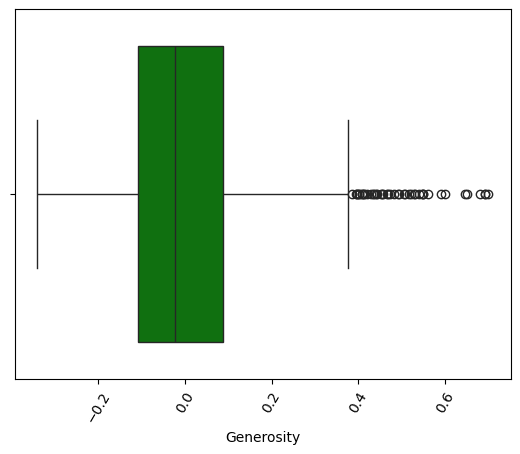

In [24]:
sns.boxplot(x ='Generosity', data = df , color = 'green')
plt.xticks(rotation = 60)
plt.show()

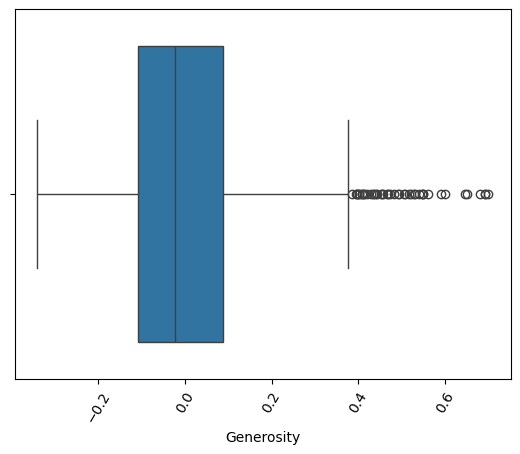

In [25]:
sns.boxplot(x ='Generosity', data = df )
plt.xticks(rotation = 60)
plt.show()

"Social Support" and "Freedom to Make Life Choices" have relatively narrow IQRs, meaning these features are more consistent across countries. On the other hand, "Generosity" and "Perceptions of Corruption" show outliers, indicating that these features are more variable and differ significantly in some countries.

In [26]:
denmark_data = df_2023[df_2023["Country name"] == "Denmark"]
denmark_data.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
558,Denmark,2023,7.504193,10.996293,0.91567,71.5,0.922739,0.089434,0.183567,0.757006,0.229489


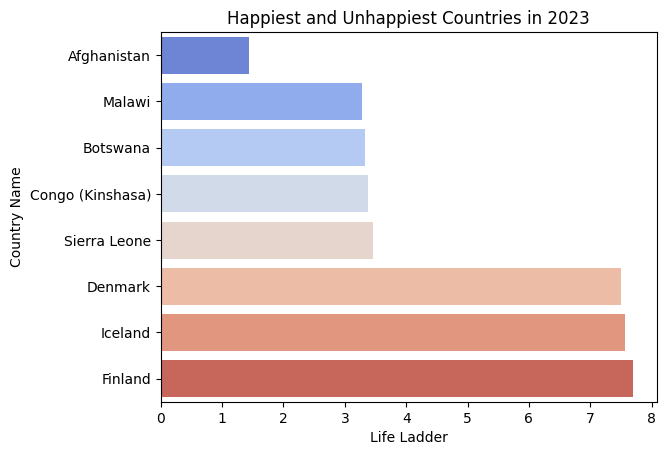

In [27]:
# Filter for happiest and unhappiest countries
df_happiest_unhappiest = df_2023[(df_2023['Life Ladder'] > 7.4) | (df_2023['Life Ladder'] < 3.5)]

# Sort the DataFrame by 'Life Ladder' in ascending order
df_happiest_unhappiest = df_happiest_unhappiest.sort_values(by='Life Ladder', ascending=True)

# Create the bar plot with a color palette
sns.barplot(x='Life Ladder', y='Country name', data=df_happiest_unhappiest, hue='Country name', palette='coolwarm', legend=False)
plt.title('Happiest and Unhappiest Countries in 2023')
plt.xlabel('Life Ladder')
plt.ylabel('Country Name')
plt.show()


So in general European countries have higher ladder score meaning they are more happier 
while african countries have lower ladder score in general

## Bivariate analysis

In [28]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

Our target variable is Life ladder and so we will do bivariate analysis of other columns with life ladder

<Axes: xlabel='Log GDP per capita', ylabel='Life Ladder'>

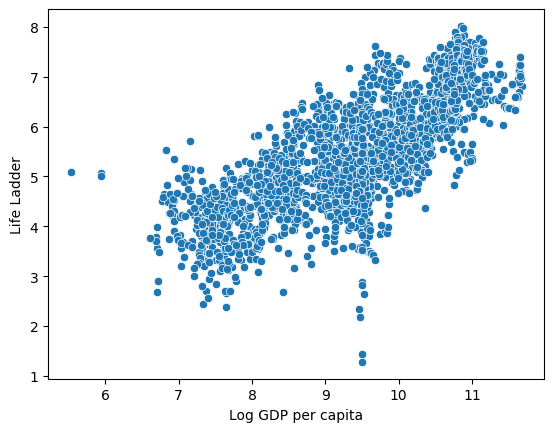

In [29]:
sns.scatterplot(x='Log GDP per capita', y='Life Ladder', data=df)


So in general as the GDP is increasing the happiness is also increasing

<Axes: xlabel='Social support', ylabel='Life Ladder'>

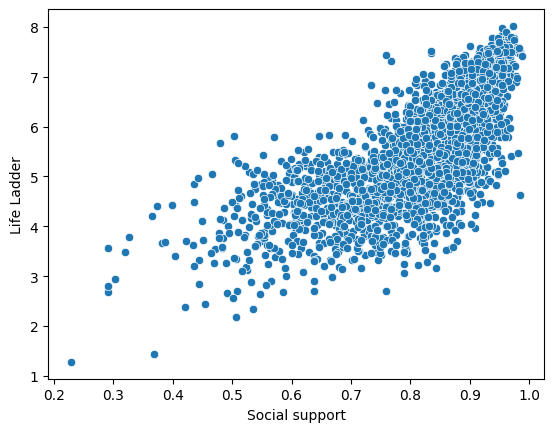

In [30]:
sns.scatterplot(x='Social support', y='Life Ladder', data=df )


So in general as the Social support is increasing the happiness is also increasing

<Axes: xlabel='Healthy life expectancy at birth', ylabel='Life Ladder'>

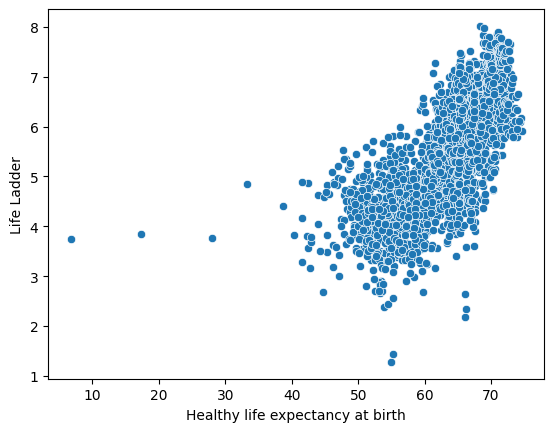

In [31]:
sns.scatterplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df )


In [32]:
correlation = df['Healthy life expectancy at birth'].corr(df['Life Ladder'])
print(correlation)


0.7104537049918584


<Axes: xlabel='Generosity', ylabel='Life Ladder'>

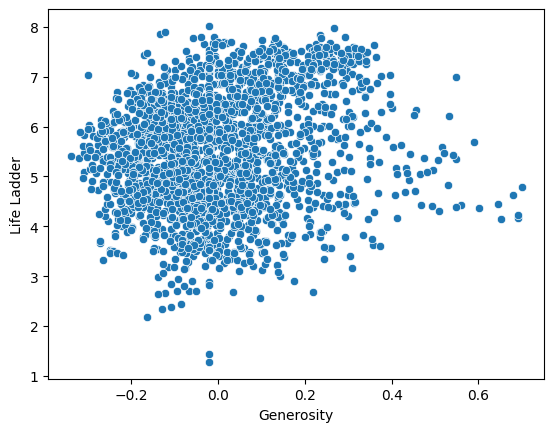

In [33]:
sns.scatterplot(x='Generosity', y='Life Ladder', data=df )


So from the scatter plot we find that there is very less correlation between happiness and generosity

<Axes: xlabel='Perceptions of corruption', ylabel='Life Ladder'>

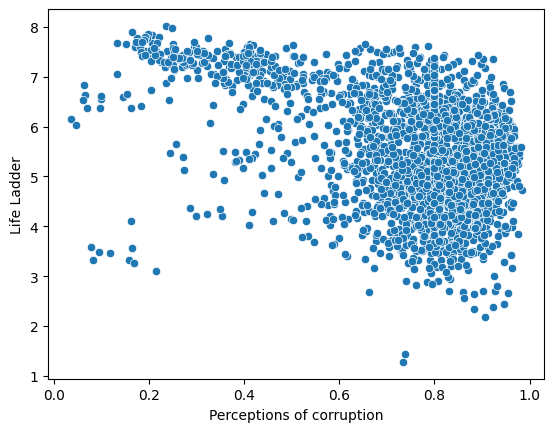

In [34]:
sns.scatterplot(x='Perceptions of corruption', y='Life Ladder', data=df )


In [35]:
correlation = df['Perceptions of corruption'].corr(df['Life Ladder'])
print(correlation)

-0.4185077884343154


 So perception of corruption has negative correlationwith happiness but the plot also reveals that even in higher ladder score countries perception of corruption can be high

<Axes: xlabel='Positive affect', ylabel='Life Ladder'>

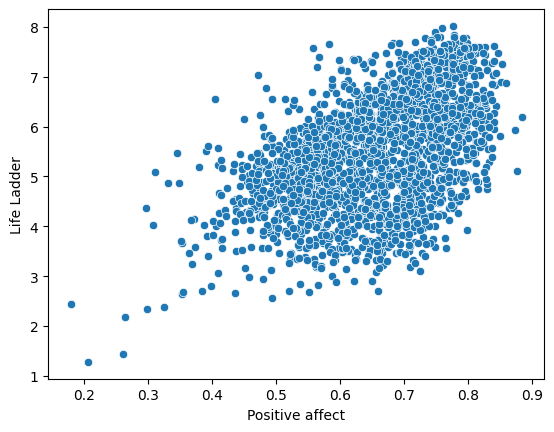

In [36]:
sns.scatterplot(x='Positive affect', y='Life Ladder', data=df )


In [37]:
#converting numercial data into categorical for better visualization
def categorize_perception(value):
    if value < df["Perceptions of corruption"].mean():
        return 'good'
    else:
        return 'bad'
df['Corruption Category'] = df['Perceptions of corruption'].apply(categorize_perception)
df['Generosity level'] = df['Generosity'].apply(categorize_perception)


In [38]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Corruption Category,Generosity level
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,bad,good
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,bad,good
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,good,good
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,good,good
5,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,bad,good


In [39]:
print(df['Corruption Category'].unique())


['bad' 'good']


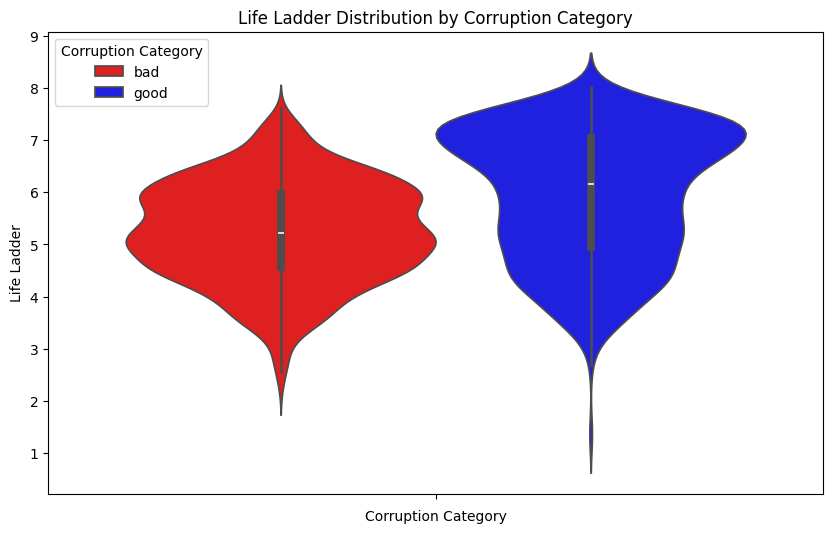

In [40]:
custom_palette = {
    'bad': 'red',
    'good': 'blue'
}
plt.figure(figsize=(10, 6))
sns.violinplot(hue='Corruption Category', y='Life Ladder', data=df, palette=custom_palette)

# Add titles and labels
plt.title('Life Ladder Distribution by Corruption Category')
plt.xlabel('Corruption Category')
plt.ylabel('Life Ladder')

# Show the plot
plt.show()


## Multivariate analysis

#### 1. How does happiness score is varying for particular countries in year on year basis

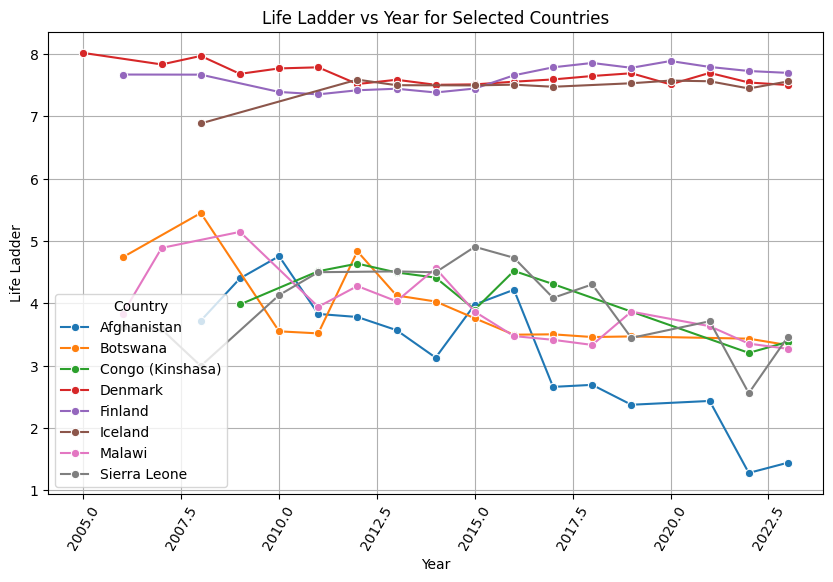

In [41]:
countries_of_interest = df_2023[(df_2023['Life Ladder'] > 7.4) | (df_2023['Life Ladder'] < 3.5)]['Country name'].tolist()
filtered_df = df[df['Country name'].isin(countries_of_interest)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='Life Ladder', hue='Country name', marker='o')
plt.title('Life Ladder vs Year for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend(title='Country')
plt.xticks(rotation = 60)
plt.grid()
plt.show()

An interseting pattern which one can note from above is that the counties having higher happiness score are maintaing the same level but the countires with very low score in longer run are becoming more unhappier on year-on-year basis

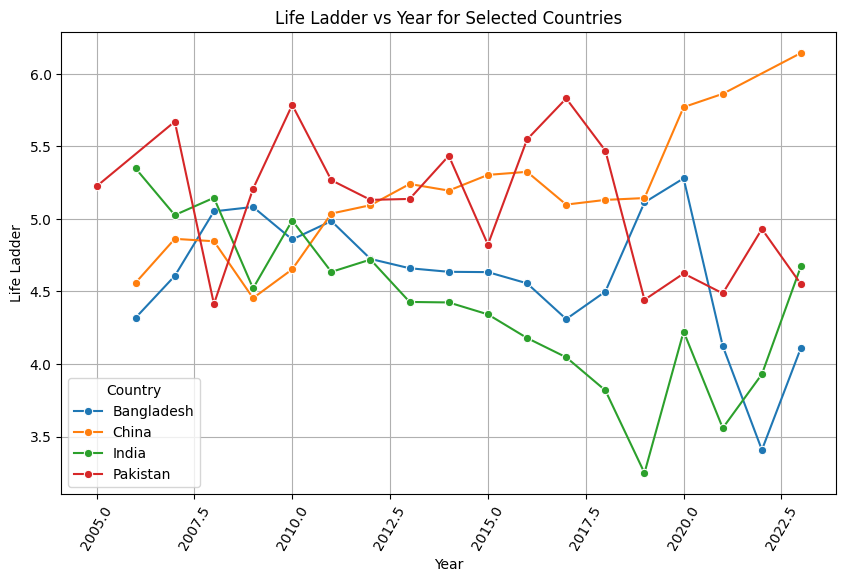

In [42]:
# let see how happniness score is varying with year for mid Happier countries like in Indian subcontinent 

countries_of_interest = ("India" , "China" , "Pakistan" , "Bangladesh")
filtered_df = df[df['Country name'].isin(countries_of_interest)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='Life Ladder', hue='Country name', marker='o')
plt.title('Life Ladder vs Year for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend(title='Country')
plt.xticks(rotation = 60)
plt.grid()
plt.show()

So in mid range countries the score is quite varying for countries like china it it constantly increasing while for countries like India it has decrresed 

#### 2. Possible reasons for decline in happiness score in unhappy countries

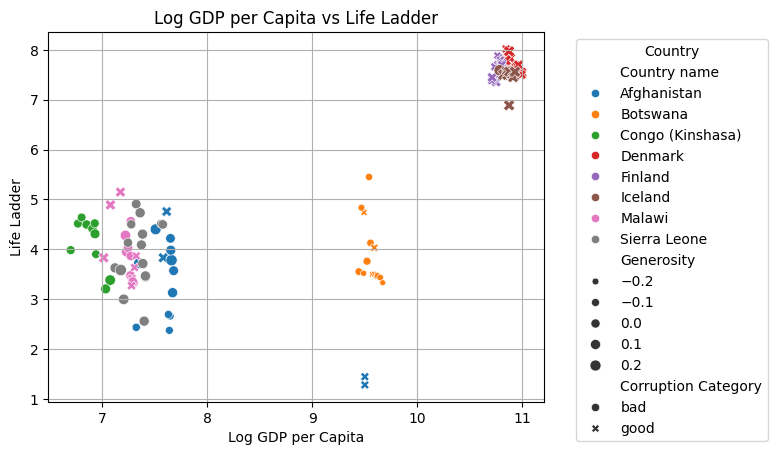

In [43]:
countries_of_interest = df_2023[(df_2023['Life Ladder'] > 7.4) | (df_2023['Life Ladder'] < 3.5)]['Country name'].tolist()
filtered_df = df[df['Country name'].isin(countries_of_interest)]
sns.scatterplot(data= filtered_df, x='Log GDP per capita', y='Life Ladder', hue='Country name', size ='Generosity',  style = "Corruption Category" , marker='o')
plt.title('Log GDP per Capita vs Life Ladder')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid()
plt.show()

So countries having lower Ladder score(Happiness score) are actually having lower GDP and higher corruption. Generosity is higher in case of happier countries but in case of lower ladder score countries it does not reveal much info as it does not show any direct relation with Happiness level

#### 3. ANOVA TEST

In [44]:
#now we will perform anova to check if the happiness level is same between countires with higher level of corruption and countires with lower level of corruption
grouped_data = [df['Life Ladder'][df['Perceptions of corruption'] == group].values for group in df['Perceptions of corruption'].unique()]

# ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

print('F-statistic:', f_statistic)
print('P-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

F-statistic: 1.5820542048642605
P-value: 0.0005816837137336623
Reject the null hypothesis: At least one group mean is different.


#### 4. Remove skewness  


In [45]:
excluded_columns = ['Country name', 'year' , 'Life Ladder' , 'Corruption Category' , 'Generosity level']                
remaining_columns = [col for col in df.columns if col not in excluded_columns]
pt = PowerTransformer(method='yeo-johnson')                              #as many columns are left skewed and have negatove c=values as well so we choose yeo johnson transformation
df[remaining_columns] = pt.fit_transform(df[remaining_columns])
df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Corruption Category,Generosity level
0,Afghanistan,2008,3.723590,-1.663193,-2.044528,-1.704961,-0.386880,1.080115,0.890987,-1.968685,-0.058047,bad,good
1,Afghanistan,2009,4.401778,-1.557533,-1.764756,-1.681258,-0.656985,1.193807,0.561989,-1.520477,-0.328629,bad,good
2,Afghanistan,2010,4.758381,-1.485735,-1.808593,-1.657094,-1.134637,0.841198,-0.576775,-1.258945,0.149712,good,good
3,Afghanistan,2011,3.831719,-1.508131,-1.864263,-1.632462,-1.648442,1.060341,-0.418699,-1.531763,0.052143,good,good
5,Afghanistan,2012,3.782938,-1.453555,-1.865652,-1.607357,-1.489560,1.410967,-0.094677,-0.453457,0.061151,bad,good


In [46]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2.363000e+03,2.363000e+03,2.363000e+03,2.363000e+03,2.363000e+03,2.363000e+03,2.363000e+03,2.363000e+03
mean,2014.763860,5.483562,6.013904e-16,1.804171e-17,-4.209733e-17,2.706257e-16,1.804171e-17,-8.720161e-17,-2.165005e-16,-1.262920e-16
std,5.059436,1.125523,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00
min,2005.000000,1.281271,-2.689986e+00,-2.342059e+00,-2.636565e+00,-2.489634e+00,-2.870817e+00,-2.101959e+00,-3.124784e+00,-2.942452e+00
25%,2011.000000,4.646750,-8.166691e-01,-7.720170e-01,-7.607714e-01,-7.661708e-01,-6.473170e-01,-6.396994e-01,-8.086417e-01,-7.209664e-01
50%,2015.000000,5.448725,1.477171e-02,1.967560e-02,1.054580e-01,1.544434e-02,-5.694753e-03,9.096350e-02,2.019868e-02,-8.856325e-03
75%,2019.000000,6.323592,8.548498e-01,8.287873e-01,7.485918e-01,8.025701e-01,6.772483e-01,7.000515e-01,7.908071e-01,7.050122e-01
max,2023.000000,8.018934,2.263500e+00,2.105618e+00,2.264619e+00,2.147637e+00,2.957123e+00,2.185916e+00,2.646118e+00,3.206327e+00


#### 5. Correlation Matrix

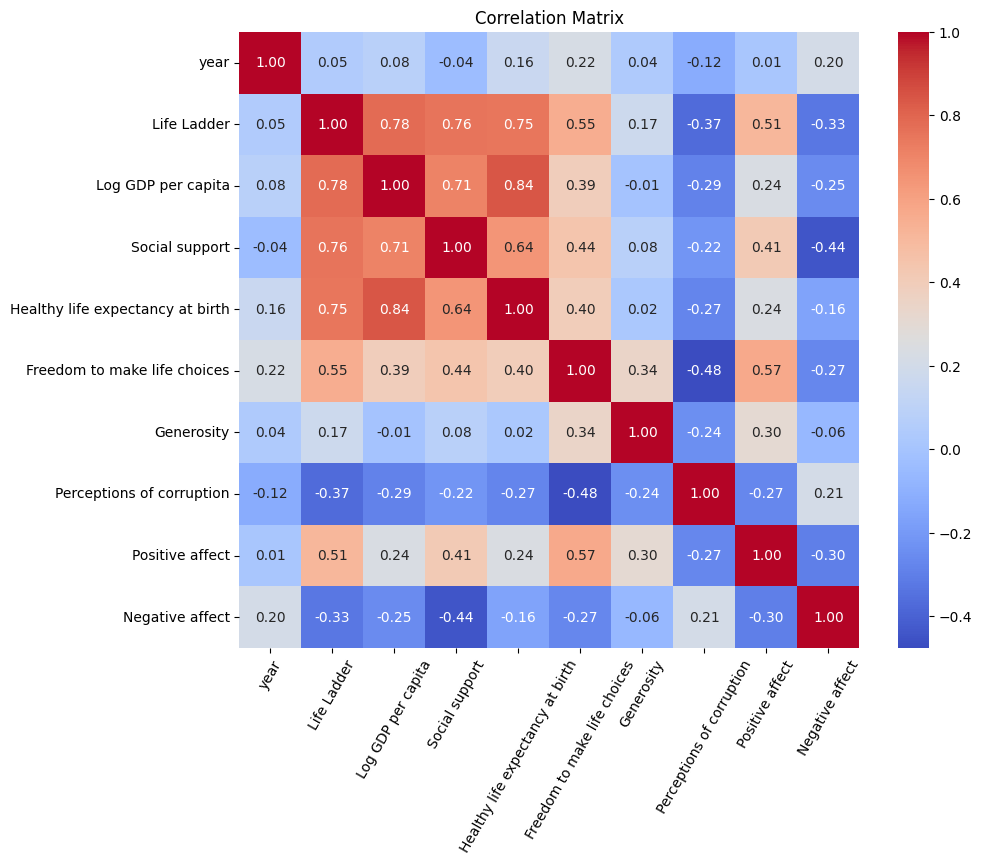

In [47]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation = 60)
plt.show()


#### 6. PCA

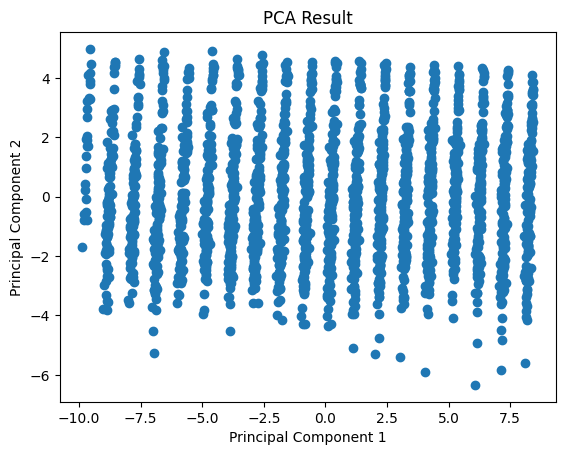

In [48]:
# Since some of the columns have high corelation with each other we can apply PCA to reduce dimensionality 
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df[numeric_cols])
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

